###Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

###Load and Inspect

In [3]:
diabetes = pd.read_csv("diabetes.csv")

print("First 5 rows:\n")
print(diabetes.head())

print("\nShape (rows, cols):", diabetes.shape)

print("\nMissing values per column:\n")
print(diabetes.isnull().sum())

print("\nBasic info:")
print(diabetes.info())


First 5 rows:

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Shape (rows, cols): (768, 9)

Missing values per column:

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                

###Step 2a — Sample 25 rows, compare Glucose statistics

STEP 2a
Sample mean Glucose:      116.64
Population mean Glucose:  120.89
Sample max Glucose:       183
Population max Glucose:   199


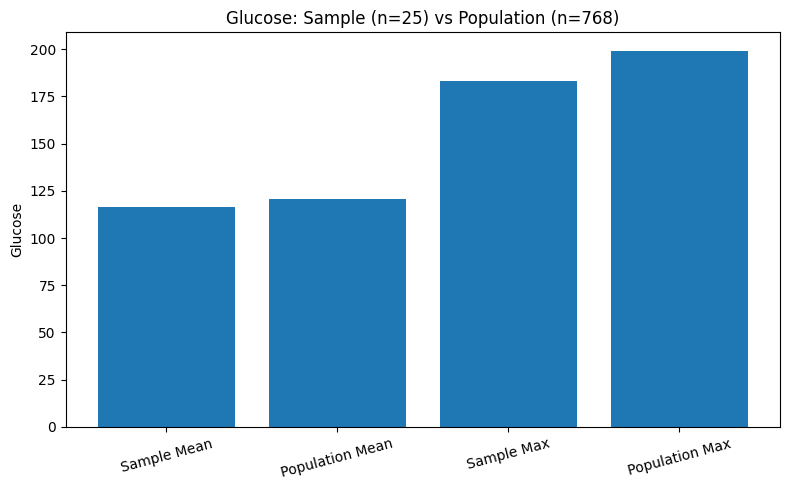

In [4]:
# Seed for reproducibility
np.random.seed(42)

# Random sample of 25 observations
sample = diabetes.sample(25)

# Compute
sample_mean_glu = sample['Glucose'].mean()
sample_max_glu  = sample['Glucose'].max()
pop_mean_glu    = diabetes['Glucose'].mean()
pop_max_glu     = diabetes['Glucose'].max()

print("STEP 2a")
print("Sample mean Glucose:     ", round(sample_mean_glu, 2))
print("Population mean Glucose: ", round(pop_mean_glu, 2))
print("Sample max Glucose:      ", int(sample_max_glu))
print("Population max Glucose:  ", int(pop_max_glu))

# Bar chart comparison
labels = ['Sample Mean', 'Population Mean', 'Sample Max', 'Population Max']
values = [sample_mean_glu, pop_mean_glu, sample_max_glu, pop_max_glu]

plt.figure(figsize=(8,5))
plt.bar(labels, values)   # no custom colors or styles
plt.title("Glucose: Sample (n=25) vs Population (n=768)")
plt.ylabel("Glucose")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


###Step 2b - 98th percentile of BMI

STEP 2b
Sample 98th percentile of BMI:      40.25
Population 98th percentile of BMI:  47.53


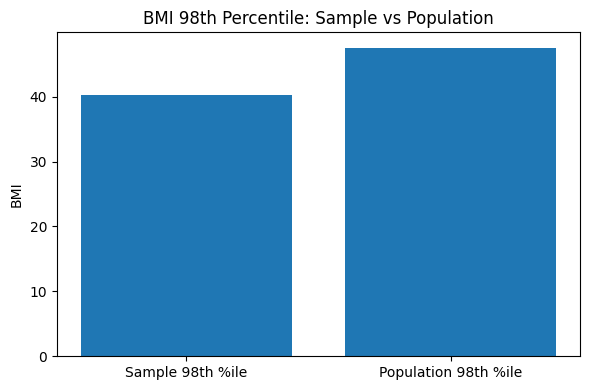

In [5]:
bmi_98_sample = np.percentile(sample['BMI'], 98)
bmi_98_pop    = np.percentile(diabetes['BMI'], 98)

print("STEP 2b")
print("Sample 98th percentile of BMI:     ", round(bmi_98_sample, 2))
print("Population 98th percentile of BMI: ", round(bmi_98_pop, 2))

# Bar chart comparison
labels = ['Sample 98th %ile', 'Population 98th %ile']
values = [bmi_98_sample, bmi_98_pop]

plt.figure(figsize=(6,4))
plt.bar(labels, values)
plt.title("BMI 98th Percentile: Sample vs Population")
plt.ylabel("BMI")
plt.tight_layout()
plt.show()


###Step 2C - Bootstrap

In [6]:
#Mean, std, and 98th percentile for each sample.

def bootstrap_stats(data, column, n_boot=500, sample_size=150, random_state=42):
    rng = np.random.default_rng(random_state)
    stats = {
        "mean": [],
        "std": [],
        "p98": []
    }
    for _ in range(n_boot):
        # sample with replacement
        boot = data.sample(sample_size, replace=True, random_state=rng.integers(0, 1_000_000))
        col = boot[column].values
        stats["mean"].append(col.mean())
        stats["std"].append(col.std(ddof=1))  # sample std
        stats["p98"].append(np.percentile(col, 98))
    return pd.DataFrame(stats)

boot_df = bootstrap_stats(diabetes, column="BloodPressure", n_boot=500, sample_size=150, random_state=42)
boot_df.head()


,mean,std,p98
0,67.973333,19.546862,96.12
1,71.273333,20.269956,98.24
2,70.126667,16.427304,92.06
3,71.100000,17.400822,100.08
4,69.693333,19.122686,92.04
